In [76]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np

In [33]:
df_train = pd.read_csv('train (3).csv')
df_test = pd.read_csv('test020920251.csv')

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [35]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [36]:
pd.set_option('display.max_columns', None)

In [37]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [38]:
for col in df_train.columns:
    print(f"{col}: {df_train[col].nunique()} unique values")

Id: 1460 unique values
MSSubClass: 15 unique values
MSZoning: 5 unique values
LotFrontage: 110 unique values
LotArea: 1073 unique values
Street: 2 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
OverallQual: 10 unique values
OverallCond: 9 unique values
YearBuilt: 112 unique values
YearRemodAdd: 61 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 3 unique values
MasVnrArea: 327 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinSF1: 637 unique values
BsmtFinType2: 6 unique va

Each null variable in the alley column will be filled with no alley cuz it means that the house has no alleys of anytype

In [39]:
df_train["Alley"].fillna("No Alley", inplace=True)

C:\Users\omarshabanabdelghany\AppData\Local\Temp\ipykernel_9720\1252663507.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Alley"].fillna("No Alley", inplace=True)


In [40]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [43]:
df_train['HasFrontage'] = df_train['LotFrontage'].notna().astype(int)

df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage']\
                      .transform(lambda x: x.fillna(x.median()))

df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())

print(df_train['LotFrontage'].isna().sum(), "missing values remain")
print(df_train[['LotFrontage', 'HasFrontage']].head())

0 missing values remain
   LotFrontage  HasFrontage
0         65.0            1
1         80.0            1
2         68.0            1
3         60.0            1
4         84.0            1


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [45]:
df_train.isna().sum()[df_train.isna().sum() > 0]

MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [46]:
df_train.drop(["PoolQC", "Fence", "MiscFeature","MasVnrType"], axis=1, inplace=True)

In [47]:
df_train['FireplaceQu'].fillna('No Fireplace', inplace=True)
df_train['GarageType'].fillna('No Garage', inplace=True)
df_train['GarageYrBlt'].fillna(0, inplace=True)
df_train['GarageFinish'].fillna('No Garage', inplace=True)
df_train['GarageQual'].fillna('No Garage', inplace=True)
df_train['GarageCond'].fillna('No Garage', inplace=True)
df_train['BsmtQual'].fillna('No Basement', inplace=True)
df_train['BsmtCond'].fillna('No Basement', inplace=True)
df_train['BsmtExposure'].fillna('No Basement', inplace=True)
df_train['BsmtFinType1'].fillna('No Basement', inplace=True)
df_train['BsmtFinType2'].fillna('No Basement', inplace=True)
df_train['MasVnrArea'].fillna(0, inplace=True)
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0], inplace=True)

C:\Users\omarshabanabdelghany\AppData\Local\Temp\ipykernel_9720\1048071444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['FireplaceQu'].fillna('No Fireplace', inplace=True)
C:\Users\omarshabanabdelghany\AppData\Local\Temp\ipykernel_9720\1048071444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [48]:
df_train.isna().sum()[df_train.isna().sum() > 0]

Series([], dtype: int64)

In [49]:
df_encoded = pd.get_dummies(df_train, drop_first=True)

In [50]:
corr = df_encoded.corr()['SalePrice'].sort_values(ascending=False)
print(corr)

SalePrice                   1.000000
OverallQual                 0.790982
GrLivArea                   0.708624
GarageCars                  0.640409
GarageArea                  0.623431
                              ...   
GarageFinish_Unf           -0.410608
BsmtQual_TA                -0.452394
FireplaceQu_No Fireplace   -0.471908
KitchenQual_TA             -0.519298
ExterQual_TA               -0.589044
Name: SalePrice, Length: 248, dtype: float64


In [51]:
# Show all columns
pd.set_option('display.max_columns', None)

# Optional: prevent line wrapping
pd.set_option('display.width', None)

# Now your correlation will display fully
corr = df_encoded.corr()['SalePrice'].sort_values(ascending=False)
print(corr)

SalePrice                   1.000000
OverallQual                 0.790982
GrLivArea                   0.708624
GarageCars                  0.640409
GarageArea                  0.623431
                              ...   
GarageFinish_Unf           -0.410608
BsmtQual_TA                -0.452394
FireplaceQu_No Fireplace   -0.471908
KitchenQual_TA             -0.519298
ExterQual_TA               -0.589044
Name: SalePrice, Length: 248, dtype: float64


In [52]:
# Show all rows
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

# Optional: prevent line wrapping
pd.set_option('display.width', None)

# Now your correlation will display fully
corr = df_encoded.corr()['SalePrice'].sort_values(ascending=False)
print(corr)

SalePrice                   1.000000
OverallQual                 0.790982
GrLivArea                   0.708624
GarageCars                  0.640409
GarageArea                  0.623431
TotalBsmtSF                 0.613581
1stFlrSF                    0.605852
FullBath                    0.560664
TotRmsAbvGrd                0.533723
YearBuilt                   0.522897
YearRemodAdd                0.507101
Foundation_PConc            0.497734
MasVnrArea                  0.472614
Fireplaces                  0.466929
ExterQual_Gd                0.452466
BsmtFinType1_GLQ            0.434597
Neighborhood_NridgHt        0.402149
BsmtFinSF1                  0.386420
SaleType_New                0.357509
SaleCondition_Partial       0.352060
LotFrontage                 0.349876
FireplaceQu_Gd              0.339329
GarageType_Attchd           0.335961
Neighborhood_NoRidge        0.330424
WoodDeckSF                  0.324413
KitchenQual_Gd              0.321641
2ndFlrSF                    0.319334
O

In [53]:
corr_df = corr.reset_index()
corr_df.columns = ['Feature', 'CorrelationWithSalePrice']

print(corr_df)  # Will now show all rows

                      Feature  CorrelationWithSalePrice
0                   SalePrice                  1.000000
1                 OverallQual                  0.790982
2                   GrLivArea                  0.708624
3                  GarageCars                  0.640409
4                  GarageArea                  0.623431
5                 TotalBsmtSF                  0.613581
6                    1stFlrSF                  0.605852
7                    FullBath                  0.560664
8                TotRmsAbvGrd                  0.533723
9                   YearBuilt                  0.522897
10               YearRemodAdd                  0.507101
11           Foundation_PConc                  0.497734
12                 MasVnrArea                  0.472614
13                 Fireplaces                  0.466929
14               ExterQual_Gd                  0.452466
15           BsmtFinType1_GLQ                  0.434597
16       Neighborhood_NridgHt                  0

In [54]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [57]:
print(f"Original features: {X.shape[1]}")
print(f"Reduced to: {X_pca.shape[1]} components")
print("Explained variance ratio:", pca.explained_variance_ratio_)

Original features: 247
Reduced to: 159 components
Explained variance ratio: [0.06624381 0.03271898 0.02907317 0.02452744 0.02386369 0.01963363
 0.01618157 0.01516072 0.01266523 0.01252036 0.01206729 0.01149402
 0.01120257 0.01115761 0.01045205 0.01039395 0.01027216 0.00973154
 0.00947866 0.00924588 0.00892519 0.00882108 0.00862597 0.00855736
 0.0084717  0.00831643 0.0080726  0.00797603 0.00775278 0.00769201
 0.00748908 0.00743542 0.007382   0.00714422 0.00702188 0.00699478
 0.00684392 0.00673063 0.00672526 0.00665486 0.00660969 0.00640202
 0.00629289 0.00623662 0.00621019 0.00614089 0.00611764 0.00602559
 0.00592638 0.0058931  0.00580717 0.00569137 0.0056218  0.00559976
 0.00549819 0.00545712 0.0053765  0.00530361 0.00523937 0.0051642
 0.00509019 0.00503946 0.00501169 0.00499397 0.00494278 0.00486823
 0.0048235  0.00476523 0.00473569 0.00467748 0.00462164 0.00461886
 0.00458558 0.00453558 0.00446615 0.00445473 0.00444647 0.00440401
 0.00434431 0.00431501 0.00426537 0.00424119 0.0042012

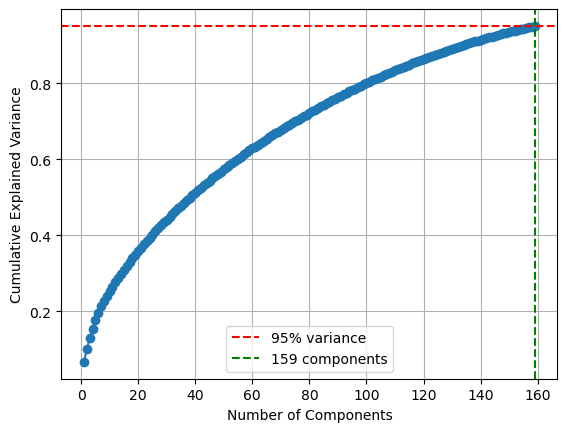

Components needed for 95% variance: 159


In [58]:
# Calculate the number of components for 95% variance
threshold = 0.95
n_components_95 = np.argmax(pca.explained_variance_ratio_.cumsum() >= threshold) + 1

# Plot with threshold line
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100:.0f}% variance')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

print(f"Components needed for {threshold*100:.0f}% variance: {n_components_95}")


In [59]:
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_pca["salesPrice"] = y.values
pd.set_option('display.max_rows', 20)
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,salesPrice
0,3.927907,-2.113363,-0.295345,-0.903903,-1.596632,-2.096441,-0.541927,-1.649576,1.102044,0.284952,-1.108814,0.204204,0.163993,-1.039080,-0.302465,0.512817,1.572393,-1.244491,0.405561,-0.671691,-0.980843,0.203525,0.683542,0.154133,0.013795,-0.819257,0.008283,0.800964,-0.634817,0.395287,-0.503455,-0.464344,-1.240916,0.463345,0.468586,-0.083778,0.209858,0.201030,0.730994,0.226486,-0.555625,-0.402750,-0.734722,-0.645310,-0.281013,0.467630,-0.212753,-0.539295,0.401243,0.306818,0.305467,0.277598,0.648448,-0.538465,0.606894,-0.174859,0.375742,-0.084150,-0.145230,0.396940,0.155802,-0.218462,-0.274886,0.491700,0.400704,-0.284172,0.145004,-0.634298,-0.421126,0.477470,0.089030,-0.208296,-0.697948,-0.012802,-0.160296,0.439623,0.704016,-0.164330,-0.070936,0.043545,-0.299722,-0.653752,-0.231301,0.495337,0.130634,0.494014,0.582982,0.491676,-0.515081,0.294509,-0.983330,0.331498,-0.642672,0.665504,0.533230,0.356763,0.082167,0.230821,-0.244924,0.595411,-0.752842,-0.642449,0.003642,-0.301507,0.001122,-0.287724,-0.053142,0.416729,-0.369546,0.085384,0.010649,-0.134118,-0.306171,-0.286465,-0.390564,-0.046265,0.142919,-0.011937,0.410322,-0.367979,0.204179,0.432916,-0.151484,-0.020262,0.042155,0.052010,-0.271011,-0.434274,0.081870,0.423921,-0.214029,0.389559,-0.339999,0.198740,0.083867,-0.214843,0.177167,0.342191,-0.085482,-0.308891,-0.257392,-0.435012,0.346458,0.137699,0.227612,0.083512,-0.147881,-0.210287,-0.030933,0.050898,0.214325,0.219219,0.048166,-0.403914,0.124751,-0.092972,-0.000481,0.103151,0.035414,208500
1,0.354406,3.035968,0.166880,1.244757,-0.670641,-0.484763,0.559892,-0.486142,0.002558,-0.441293,-1.974360,1.270128,0.621479,-0.148898,1.325493,-1.057986,-2.926619,-0.814259,-0.389061,0.543684,0.300088,0.499277,-0.442506,-2.119509,-2.306627,1.071113,-1.248404,-0.359172,1.600817,1.782995,-0.817339,1.082643,2.048569,1.340555,0.653563,-1.516368,-0.770413,0.085723,-2.138593,-2.554753,1.147228,-0.854194,0.424671,-0.859757,2.149838,-1.858875,3.655705,-0.404398,-0.069789,-0.488805,2.220905,-2.316351,1.671619,-0.338023,-1.873497,-1.975209,2.264575,-0.996992,3.318990,-1.241125,0.976674,-0.618615,-2.949495,0.583138,1.844813,2.062164,-0.981802,-1.204265,-1.961115,0.580285,-0.148052,0.626175,0.624904,-0.035561,0.436456,-0.265186,1.673130,0.409716,1.210372,-2.312543,-0.753230,-0.806984,-0.461873,0.479013,0.050770,-0.844279,-1.281395,-0.300258,1.156280,1.204232,-1.410724,0.860670,-0.598262,-0.139645,1.904052,0.864558,1.409829,0.049466,1.325560,-0.827246,-0.592696,1.068193,0.929031,-0.367270,-1.249767,-0.088229,-1.792534,0.723314,-0.375859,0.997103,-0.972459,-0.035970,-1.830686,2.504157,-0.039003,-1.410256,-1.200854,0.085533,-0.547287,0.371631,-0.070292,2.145392,-2.360277,3.552159,1.452673,1.755814,0.649681,1.817393,-0.858060,-1.920444,0.014690,1.793573,-1.165862,-0.191314,0.340670,-0.397181,-0.725901,-0.784504,-1.289763,-0.428454,0.403854,0.007669,-1.251919,0.447561,0.204998,0.694907,1.297720,1.020435,-0.401075,-1.536618,0.282901,-0.077733,-0.288224,0.079114,0.372626,0.639167,0.209517,0.332473,0.035572,181500
2,4.736095,-1.542366,0.159775,-0.410118,-0.827387,-2.243449,-0.169562,-2.231976,1.296518,0.230868,-0.608

In [60]:
X_pca.isna().sum()[X_pca.isna().sum() > 0]

Series([], dtype: int64)

In [61]:
x_train , x_test , y_train , y_test = train_test_split(X_pca.drop("salesPrice", axis=1), X_pca["salesPrice"], test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred, squared=False))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred, squared=False))



c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
print(f"Train R²:  {train_r2:.4f}")
print(f"Test R²:   {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE:  {test_rmse:.2f}")

Train R²:  0.8788
Test R²:   0.8406
Train RMSE: 163.96
Test RMSE:  186.98


In [63]:
def evaluate_model(model, name):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred, squared=False))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred, squared=False))

    print(f"Train R²:  {train_r2:.4f}")
    print(f"Test R²:   {test_r2:.4f}")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE:  {test_rmse:.2f}")

ridge = Ridge(alpha=1.0)
evaluate_model(ridge, "Ridge Regression")

lasso = Lasso(alpha=0.001, max_iter=10000)
evaluate_model(lasso, "lasso Regression")

Train R²:  0.8788
Test R²:   0.8408
Train RMSE: 163.96
Test RMSE:  186.94
Train R²:  0.8788
Test R²:   0.8406
Train RMSE: 163.96
Test RMSE:  186.98


c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be remove

In [74]:
dt = DecisionTreeRegressor(max_depth=4, random_state=42)
dt.fit(x_train, y_train)

y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred, squared=False))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred, squared=False))

c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [75]:
print("Decision Tree Regressor Results:")
print(f"Train R²:  {train_r2:.4f}")
print(f"Test R²:   {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE:  {test_rmse:.2f}")

Decision Tree Regressor Results:
Train R²:  0.8185
Test R²:   0.7486
Train RMSE: 181.39
Test RMSE:  209.56


In [66]:
rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42,n_jobs=-1)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred, squared=False))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred, squared=False))

print("Random Forest Regressor Results:")
print(f"Train R²:  {train_r2:.4f}")
print(f"Test R²:   {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE:  {test_rmse:.2f}")

Random Forest Regressor Results:
Train R²:  0.8709
Test R²:   0.8204
Train RMSE: 166.59
Test RMSE:  192.66


c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [87]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=400, random_state=42, activation='relu',solver='adam',
                   learning_rate='adaptive',alpha = 1, early_stopping=True)
mlp.fit(x_train, y_train)

y_train_pred = mlp.predict(x_train)
y_test_pred = mlp.predict(x_test)


train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred, squared=False))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred, squared=False))

print("MLP Regressor Results:")
print(f"Train R²:  {train_r2:.4f}")
print(f"Test R²:   {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE:  {test_rmse:.2f}")

MLP Regressor Results:
Train R²:  0.8828
Test R²:   0.6833
Train RMSE: 162.61
Test RMSE:  222.01


c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [88]:
df_test["Alley"].fillna("No Alley", inplace=True)


df_test['HasFrontage'] = df_test['LotFrontage'].notna().astype(int)

df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage']\
                      .transform(lambda x: x.fillna(x.median()))

df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].median())

print(df_test['LotFrontage'].isna().sum(), "missing values remain")
print(df_test[['LotFrontage', 'HasFrontage']].head())


df_test.drop(["PoolQC", "Fence", "MiscFeature","MasVnrType"], axis=1, inplace=True)

df_test['FireplaceQu'].fillna('No Fireplace', inplace=True)
df_test['GarageType'].fillna('No Garage', inplace=True)
df_test['GarageYrBlt'].fillna(0, inplace=True)
df_test['GarageFinish'].fillna('No Garage', inplace=True)
df_test['GarageQual'].fillna('No Garage', inplace=True)
df_test['GarageCond'].fillna('No Garage', inplace=True)
df_test['BsmtQual'].fillna('No Basement', inplace=True)
df_test['BsmtCond'].fillna('No Basement', inplace=True)
df_test['BsmtExposure'].fillna('No Basement', inplace=True)
df_test['BsmtFinType1'].fillna('No Basement', inplace=True)
df_test['BsmtFinType2'].fillna('No Basement', inplace=True)
df_test['MasVnrArea'].fillna(0, inplace=True)
df_test['Electrical'].fillna(df_test['Electrical'].mode()[0], inplace=True)



0 missing values remain
   LotFrontage  HasFrontage
0         80.0            1
1         81.0            1
2         74.0            1
3         78.0            1
4         43.0            1


C:\Users\omarshabanabdelghany\AppData\Local\Temp\ipykernel_9720\2363950857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Alley"].fillna("No Alley", inplace=True)
C:\Users\omarshabanabdelghany\AppData\Local\Temp\ipykernel_9720\2363950857.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [90]:
df_test.isna().sum()[df_test.isna().sum() > 0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [91]:
col_fill_mode = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd',
                 'KitchenQual', 'Functional', 'SaleType']
for col in col_fill_mode:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

bsmt_zero = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             'BsmtFullBath', 'BsmtHalfBath']
df_test[bsmt_zero] = df_test[bsmt_zero].fillna(0)

garage_zero = ['GarageCars', 'GarageArea']
df_test[garage_zero] = df_test[garage_zero].fillna(0)

In [92]:
# One-hot encode using the same columns as training
test_encoded = pd.get_dummies(df_test)
test_encoded = test_encoded.reindex(columns=X.columns, fill_value=0)

# Scale using the scaler you fitted on training data
test_scaled = scaler.transform(test_encoded)

# Reduce using the PCA you fitted on training data
test_pca = pca.transform(test_scaled)

In [93]:
test_predictions = ridge.predict(test_pca)

c:\Users\omarshabanabdelghany\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [94]:
submission = pd.DataFrame({
    "Id": df_test["Id"],  # keep the original Id column
    "SalePrice": test_predictions
})
submission.to_csv("submission.csv", index=False)

In [95]:
result_df = df_test.merge(submission, on="Id",how='left')

In [ ]:
result_df.to_csv("test_with_predictions.csv", index=False)

: 